In [131]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import tree
from sklearn.inspection import permutation_importance

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [108]:
# Cargamos el dataset de iris
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [109]:
# Obtenemos descripción del dataset que estamos utilizando
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [110]:
# Creamos dataframe con los datos sin la columna target
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [111]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [112]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [113]:
# Creamos dataframe solo con la columna target
df_target_iris = pd.DataFrame(iris['target'])

In [114]:
# Unimos tanto los datos como la columna target
df_all = pd.concat([df_iris, df_target_iris], axis=1)
df_all

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [115]:
# Asignamos datos a X y target a y
X, y = df_iris, iris['target']

In [116]:
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [120]:
# Creamos modelo y entrenamos y prediciomos con distintas profundidades y obteniendo el classification report
for depth in range(1, 6):
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    cls_report = classification_report(y_test, y_pred, target_names=iris.target_names)
    print(f"\nProfundidad {depth} → Decision Tree - Classification Report:\n{cls_report}")


Profundidad 1 → Decision Tree - Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.45      1.00      0.62         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30


Profundidad 2 → Decision Tree - Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Profundidad 3 → Decision Tree - Classification Report:
              precision    recall  f1-score   support

      setosa   

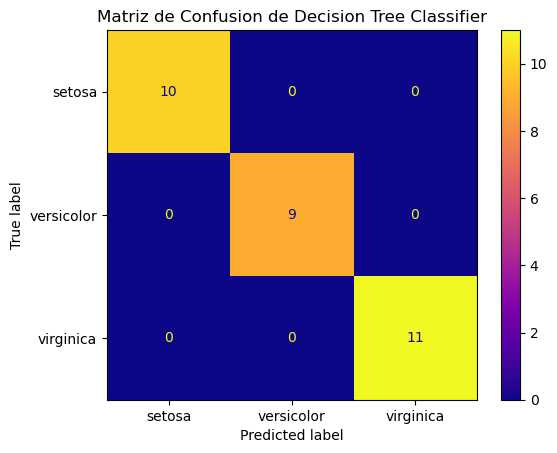

In [121]:
# Obtenemos matriz de confusion del modelo Decision Tree
cm_decision_tree = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree, display_labels=iris.target_names)
display.plot(cmap=plt.cm.plasma)
plt.title("Matriz de Confusion de Decision Tree Classifier")
plt.show()

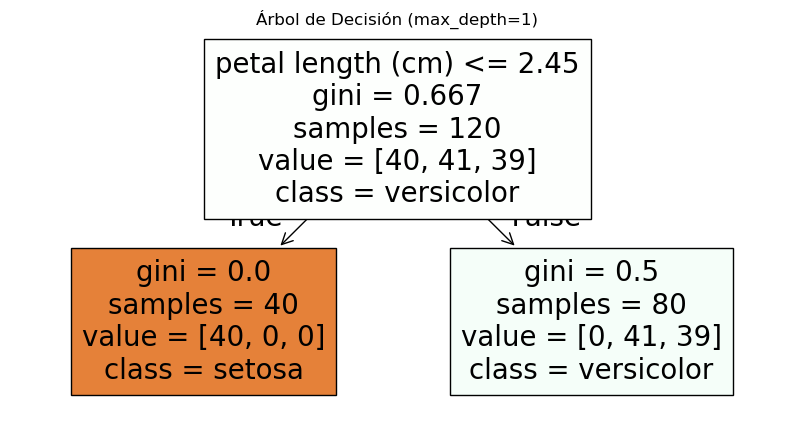

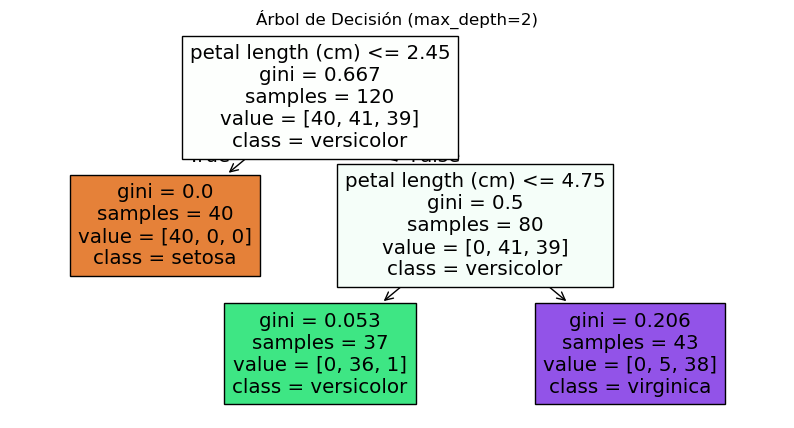

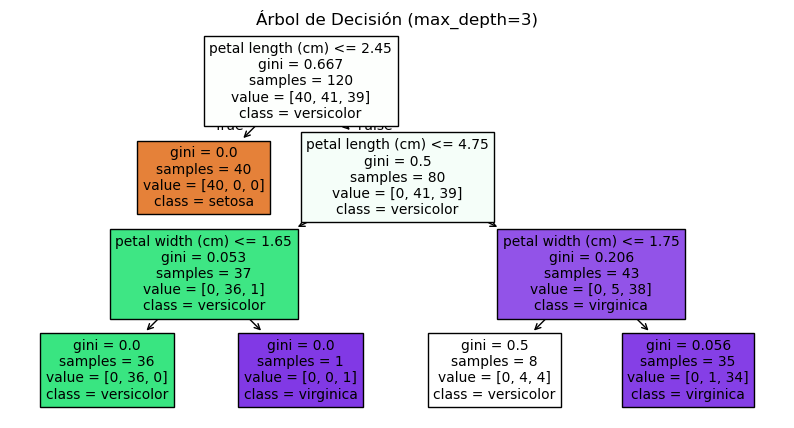

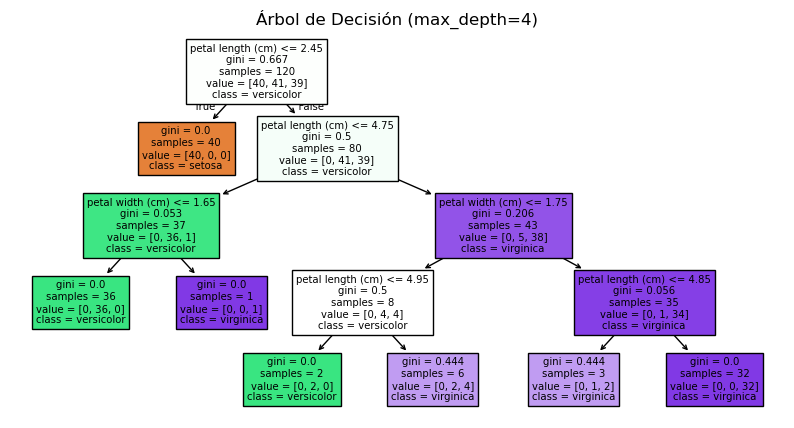

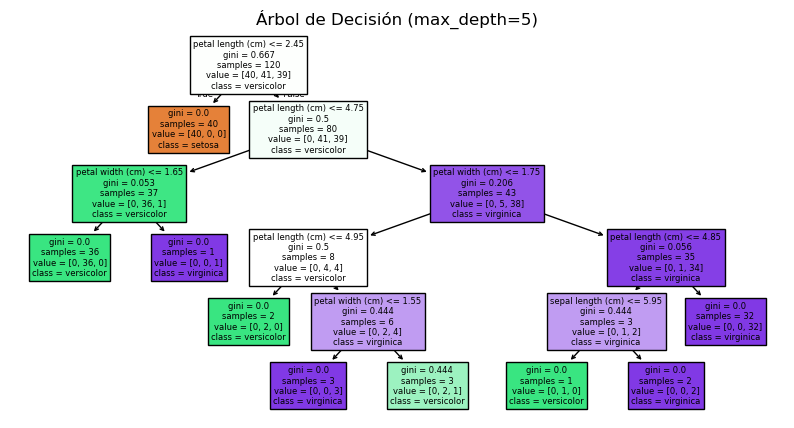

In [127]:
# representamos el arbol de cada profundidad
for depth in range(1, 6):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    fig, ax = plt.subplots(figsize=(10, 5))
    plot_tree(model,
              feature_names=iris.feature_names,
              class_names=iris.target_names,
              filled=True,
              ax=ax)
    plt.title(f"Árbol de Decisión (max_depth={depth})")
    plt.show()

In [128]:
# Creamos, entrenamos y prediciomos con Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

Random Forest - Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



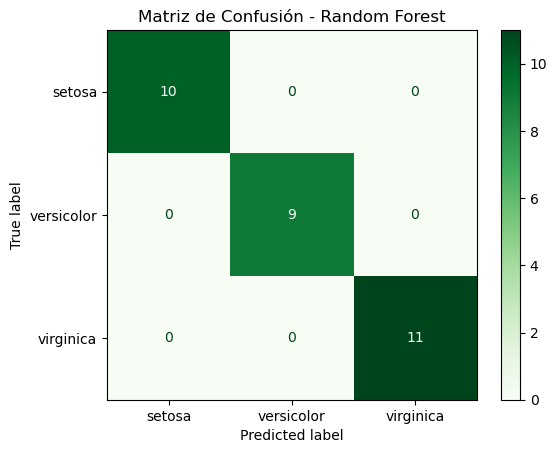

In [129]:
# Mostramos el Classification Report de Random Forest
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf, target_names=iris.target_names))

# Graficamos la Matriz de Confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=iris.target_names)
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

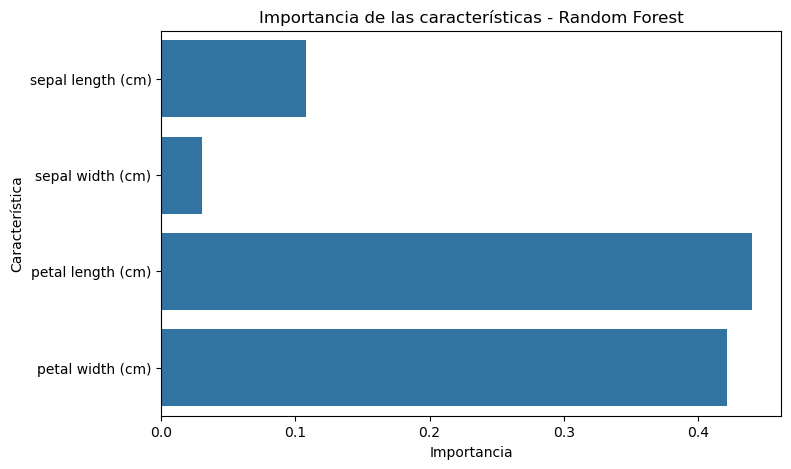

In [130]:
# Graficamos la imnportancia de las características en Random Forest
importances = random_forest.feature_importances_
features = iris.feature_names

# Visualizar
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Importancia de las características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

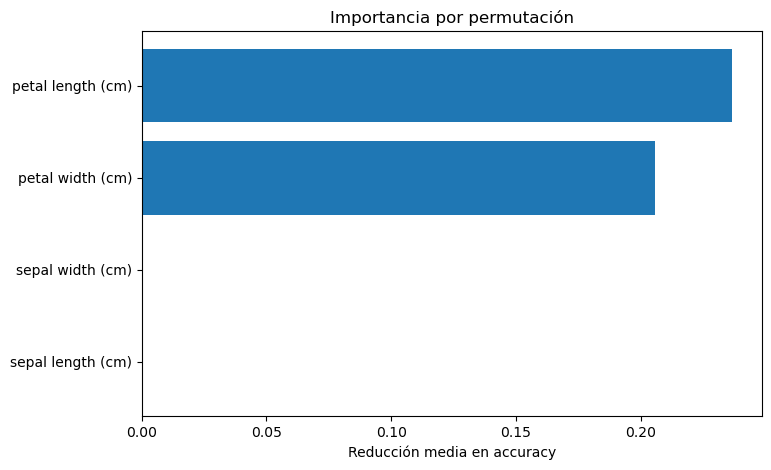

In [132]:
# Graficamos la imnportancia por permutación en Random Forest
result = permutation_importance(random_forest, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title("Importancia por permutación")
plt.xlabel("Reducción media en accuracy")
plt.show()

## 📌 Conclusión

En esta práctica se han comparado dos modelos de clasificación: **Árbol de Decisión** y **Random Forest**, aplicados al conjunto de datos **Iris**. Se ha evaluado su rendimiento con diferentes profundidades y se ha analizado la importancia de las características mediante dos enfoques.

### 🔎 Evaluación de los modelos

- El **Árbol de Decisión** con `max_depth = 1` tuvo un rendimiento bajo (accuracy ≈ 0.63), clasificando correctamente *setosa* pero fallando completamente en *virginica*.
- A partir de `max_depth = 2`, la precisión mejoró notablemente, y desde `max_depth = 3` se alcanzó un **accuracy del 100%**, mantenido hasta `max_depth = 5`.
- Este comportamiento sugiere un posible **sobreajuste** en árboles más profundos.

El modelo de **Random Forest** logró un **accuracy del 100%** desde el primer entrenamiento, mostrando mejor **capacidad de generalización** al promediar múltiples árboles. Esto lo convierte en una opción más robusta frente al sobreajuste.

### 🌿 Importancia de las características

Se analizaron las características predictoras mediante dos métodos:

**1. Importancia basada en el modelo (`feature_importances_`):**
- **Petal length (cm)** y **petal width (cm)** fueron las variables más relevantes, con importancias superiores al **40%**.
- **Sepal length (cm)** tuvo algo más del **10%**, mientras que **sepal width (cm)** fue la menos relevante (< 10%).

**2. Importancia por permutación (`permutation_importance`):**
- **Petal length (cm)** fue la más importante, con un impacto cercano a **0.25** en la métrica.
- **Petal width (cm)** también fue relevante, con un valor ligeramente superior a **0.20** pero inferior a `petal length`.
- Las características del sépalo tuvieron un impacto significativamente menor, confirmando su escasa relevancia para el modelo.

### ✅ Conclusión final

- El **Árbol de Decisión** es valioso por su capacidad de interpretación visual, pero debe limitarse su complejidad para evitar sobreajuste.
- **Random Forest** ofrece una solución más precisa y estable sin necesidad de ajustes finos, siendo más adecuado para contextos reales.
- Ambos métodos de análisis coinciden en que **las características del pétalo son claves** para predecir correctamente la especie de iris, mientras que las del sépalo aportan poca información útil.
